## Bitcoin Analysis Using Python Pandas and Matplotlib

## Introduction
Given the fact that blockchain transaction data is publicly available to everyone, we can easily obtain that data to perform on-chain analysis. Cryptocurrency is the only asset class where all trading and activity can be accessed via a public, decentralized ledger, i.e. the blockchain. A notable advantage of blockchain data is that if the data is extracted from the blockchain, there should be no null values due to the guarantees and transparency of the protocol (in our case, the Bitcoin protocol).

A nice article about on-chain analysis written by Peter Foy can be found here:<br>
https://www.mlq.ai/what-is-crypto-on-chain-analysis/

## Data
The data was obtained from Nasdaq Data Link:<br>https://data.nasdaq.com/<br>
An account must be made to obtain an API key.

I used the API to obtain the features which had entries from January 2nd, 2009 to December 14th, 2022. I decided to drop features that were missing too many dates in this range. I then combined them into a single dataframe called 'bitcoin.csv' with the date as the index.

## Features
TableName<br>
FullName<br>
Description<br>
NewestAvailableDate<br>
OldestAvailableDate<br>
<br>
ATRCT<br>
Bitcoin Median Transaction Confirmation Time in Minutes<br>
The median time for a transaction to be accepted into a mined block and added to the public ledger (note: only includes transactions with miner fees).<br>
2022-12-13<br>
2009-01-03<br>
<br>
AVBLS<br>
Bitcoin Average Block Size<br>
The average block size in MB.<br>
2022-12-13<br>
2009-01-02<br>
<br>
BLCHS<br>
Bitcoin api.blockchain Size<br>
The total size of all block headers and transactions. Not including database indexes.<br>
2022-12-13<br>
2009-01-02<br>
<br>
CPTRA<br>
Bitcoin Cost Per Transaction<br>
A chart showing miners revenue divided by the number of transactions.<br>
2022-12-13<br>
2009-01-02<br>
<br>
CPTRV<br>
Bitcoin Cost % of Transaction Volume<br>
A chart showing miners revenue as percentage of the transaction volume.<br>
2022-12-13<br>
2009-01-02<br>
<br>
DIFF<br>
Bitcoin Difficulty<br>
A relative measure of how difficult it is to find a new block. The difficulty is adjusted periodically as a function of how much hashing power has been deployed by the network of miners.<br>
2022-12-13<br>
2009-01-02<br>
<br>
ETRAV<br>
Bitcoin Estimated Transaction Volume<br>
The total estimated value of transactions on the Bitcoin blockchain (does not include coins returned to sender as change).<br>
2022-12-13<br>
2009-01-02<br>
<br>
ETRVU<br>
Bitcoin Estimated Transaction Volume USD<br>
The Estimated Transaction Value in USD value.<br>
2022-12-13<br>
2009-01-02<br>
<br>
HRATE<br>
Bitcoin Hash Rate<br>
The estimated number of tera hashes per second (trillions of hashes per second) the Bitcoin network is performing.<br>
2022-12-13<br>
2009-01-03<br>
<br>
MIREV<br>
Bitcoin Miners Revenue<br>
Total value of coinbase block rewards and transaction fees paid to miners.<br>
2022-12-13<br>
2009-01-02<br>
<br>
MKPRU<br>
Bitcoin Market Price USD<br>
Average USD market price across major bitcoin exchanges.<br>
2022-12-14<br>
2009-01-02<br>
<br>
MKTCP<br>
Bitcoin Market Capitalization<br>
The total USD value of bitcoin supply in circulation, as calculated by the daily average market price across major exchanges.<br>
2022-12-13<br>
2009-01-02<br>
<br>
NADDU<br>
Bitcoin Number of Unique Bitcoin Addresses Used<br>
The total number of unique addresses used on the Bitcoin blockchain.<br>
2022-12-13<br>
2009-01-02<br>
<br>
NTRAN<br>
Bitcoin Number of Transactions<br>
The number of daily confirmed Bitcoin transactions.<br>
2022-12-13<br>
2009-01-02<br>
<br>
NTRAT<br>
Bitcoin Total Number of Transactions<br>
Total Number of transactions<br>
2022-12-13<br>
2009-01-02<br>
<br>
NTRBL<br>
Bitcoin Number of Transaction per Block<br>
The average number of transactions per block.<br>
2022-12-13<br>
2009-01-02<br>
<br>
NTREP<br>
Bitcoin Number of Transactions Excluding Popular Addresses<br>
The total number of Bitcoin transactions, excluding those involving any of the network&#39;s 100 most popular addresses.<br>
2022-12-13<br>
2009-01-02<br>
<br>
TOTBC<br>
Total Bitcoins<br>
The total number of bitcoins that have already been mined; in other words, the current supply of bitcoins on the network.<br>
2022-12-13<br>
2009-01-02<br>
<br>
TOUTV<br>
Bitcoin Total Output Volume<br>
The total value of all transaction outputs per day (includes coins returned to the sender as change).<br>
2022-12-13<br>
2009-01-02<br>
<br>
TRFEE<br>
Bitcoin Total Transaction Fees<br>
The total value of all transaction fees paid to miners (not including the coinbase value of block rewards).<br>
2022-12-13<br>
2009-01-02<br>
<br>
TRFUS<br>
Bitcoin Total Transaction Fees USD<br>
The total value of all transaction fees paid to miners (not including the coinbase value of block rewards).<br>
2022-12-13<br>
2009-01-02<br>
<br>
TRVOU<br>
Bitcoin USD Exchange Trade Volume<br>
The total USD value of trading volume on major bitcoin exchanges.<br>
2022-12-14<br>
2009-01-02<br>
<br>

In [1]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

In [2]:
def generate_features_markdown():
    """
    Generates the markdown about all the columns (features)
    from the metadata on the bitcoin data. `<br>` stands for break,
    it is used to create a newline in markdown/HTML.
    """
    btc_metadata = pd.read_csv('data/metadata.csv')
    
    print('TableName' + '<br>')
    print('FullName' + '<br>')
    print('Description' + '<br>')
    print('NewestAvailableDate' + '<br>')
    print('OldestAvailableDate' + '<br>')
    print('<br>')
    
    for index, row in btc_metadata.iterrows():
        print(row['TableName'] + '<br>')
        print(row['FullName'] + '<br>')
        print(row['Description'] + '<br>')
        print(row['NewestAvailableDate'] + '<br>')
        print(row['OldestAvailableDate'] + '<br>')
        print('<br>')
        

## Reading the Data From the CSV

In [3]:
# Make sure to set the index column to 'Date'
bitcoin_df = pd.read_csv('data/bitcoin.csv', index_col='Date', parse_dates=['Date'])
# Let's drop January 2nd, 2009, it's the only date that some
# of the tables are missing
bitcoin_df.drop('2009-01-02', axis=0, inplace=True);

Let's take a peak at the head and tail of our Bitcoin dataset

In [4]:
bitcoin_df.head()

,ATRCT,AVBLS,BLCHS,CPTRA,CPTRV,DIFF,ETRAV,ETRVU,HRATE,MIREV,...,NADDU,NTRAN,NTRAT,NTRBL,NTREP,TOTBC,TOUTV,TRFEE,TRFUS,TRVOU
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,50.0,0.0,0.0,0.0,0.0
2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,50.0,0.0,0.0,0.0,0.0
2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,50.0,0.0,0.0,0.0,0.0
2009-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,50.0,0.0,0.0,0.0,0.0
2009-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,50.0,0.0,0.0,0.0,0.0


It makes sense that there a lot of entries are 0 in the earliest days of Bitcoin, because only Satoshi Nakamoto was using the network at the beginning.

In [5]:
bitcoin_df.tail()

,ATRCT,AVBLS,BLCHS,CPTRA,CPTRV,DIFF,ETRAV,ETRVU,HRATE,MIREV,...,NADDU,NTRAN,NTRAT,NTRBL,NTREP,TOTBC,TOUTV,TRFEE,TRFUS,TRVOU
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-09,6.350000,1.180113,442172.931203,62.856523,0.949772,3.424433e+13,102828.669654,1.768890e+09,2.587488e+08,1.680042e+07,...,662365.0,265668.0,786623545.0,1747.815789,264451.0,19229306.25,8.814164e+05,13.758094,237910.797201,8.772315e+07
2022-12-10,6.425000,1.285053,442352.479751,69.954180,1.796204,3.424433e+13,56386.779155,9.678360e+08,2.621534e+08,1.738431e+07,...,617455.0,241668.0,786890447.0,1569.272727,238339.0,19230193.75,6.753749e+05,12.258936,217025.695407,7.055010e+07
2022-12-11,5.033333,0.972099,442549.803458,73.060287,2.118001,3.424433e+13,43753.425011,7.512580e+08,2.502374e+08,1.591165e+07,...,570664.0,217788.0,787130312.0,1481.551020,217385.0,19231068.75,6.295746e+05,8.192276,140659.939839,3.108014e+07
2022-12-12,6.716667,1.200833,442693.273206,58.736706,0.873337,3.424433e+13,103777.765593,1.766438e+09,2.434282e+08,1.542696e+07,...,639530.0,262646.0,787349089.0,1836.685315,262139.0,19231943.75,8.694517e+05,12.612353,214873.475363,3.959782e+07
2022-12-13,5.791667,1.119509,442864.964951,63.714630,0.600928,3.424433e+13,174190.504152,3.045350e+09,2.808787e+08,1.830037e+07,...,710573.0,287224.0,787611923.0,1740.751515,286657.0,19233037.50,1.262929e+06,13.220871,231727.102564,8.466864e+07


We can see that the dates range from January 3rd, 2009 (around the inception of Bitcoin) to when I pulled the data on December 13th, 2022.

Now let's see how many rows and columns we're working with

In [6]:
bitcoin_df.shape

(5093, 22)

5093 entries for approximately 14 years since the inception of Bitcoin makes sense because there are 365 days in a year

In [7]:
365 * 14

5110

Let's get some more information about the dataset.

In [8]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5093 entries, 2009-01-03 to 2022-12-13
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ATRCT   4705 non-null   float64
 1   AVBLS   5093 non-null   float64
 2   BLCHS   5093 non-null   float64
 3   CPTRA   5093 non-null   float64
 4   CPTRV   5090 non-null   float64
 5   DIFF    5093 non-null   float64
 6   ETRAV   5090 non-null   float64
 7   ETRVU   5090 non-null   float64
 8   HRATE   5093 non-null   float64
 9   MIREV   5093 non-null   float64
 10  MKPRU   5093 non-null   float64
 11  MKTCP   5093 non-null   float64
 12  NADDU   5093 non-null   float64
 13  NTRAN   5093 non-null   float64
 14  NTRAT   5093 non-null   float64
 15  NTRBL   5093 non-null   float64
 16  NTREP   5093 non-null   float64
 17  TOTBC   5093 non-null   float64
 18  TOUTV   5093 non-null   float64
 19  TRFEE   5093 non-null   float64
 20  TRFUS   5093 non-null   float64
 21  TRVOU   5093 non-nu

In [9]:
# number of NA (Not Available) values in each column
for col in bitcoin_df.columns:
    print(col, bitcoin_df[col].isna().sum())

ATRCT 388
AVBLS 0
BLCHS 0
CPTRA 0
CPTRV 3
DIFF 0
ETRAV 3
ETRVU 3
HRATE 0
MIREV 0
MKPRU 0
MKTCP 0
NADDU 0
NTRAN 0
NTRAT 0
NTRBL 0
NTREP 0
TOTBC 0
TOUTV 0
TRFEE 0
TRFUS 0
TRVOU 0


We're going to have to figure out what to do with the null values. Maybe imputing could be good for certain columns depending on the meaning of the column. ATRCT has a significant amount of null values. For some reason the Nasdaq data is missing a lot for this feature.

## Data Augmentation

Since this is time series data, it's a good idea to create `year`, `month`, and `day` columns from our datetime indexes so we can more easily perform aggregations based on these columns.

In [10]:
bitcoin_df['year'] = pd.to_datetime(bitcoin_df.index.values).year
bitcoin_df['month'] = pd.to_datetime(bitcoin_df.index.values).month
bitcoin_df['day'] = pd.to_datetime(bitcoin_df.index.values).day

## Exploratory Data Analysis

The most obvious thing to visualize is the price of Bitcoin. To make it more interesting, we'll show the price of Bitcoin in each of the previous significant events.

### Before \\$1000 Bitcoin

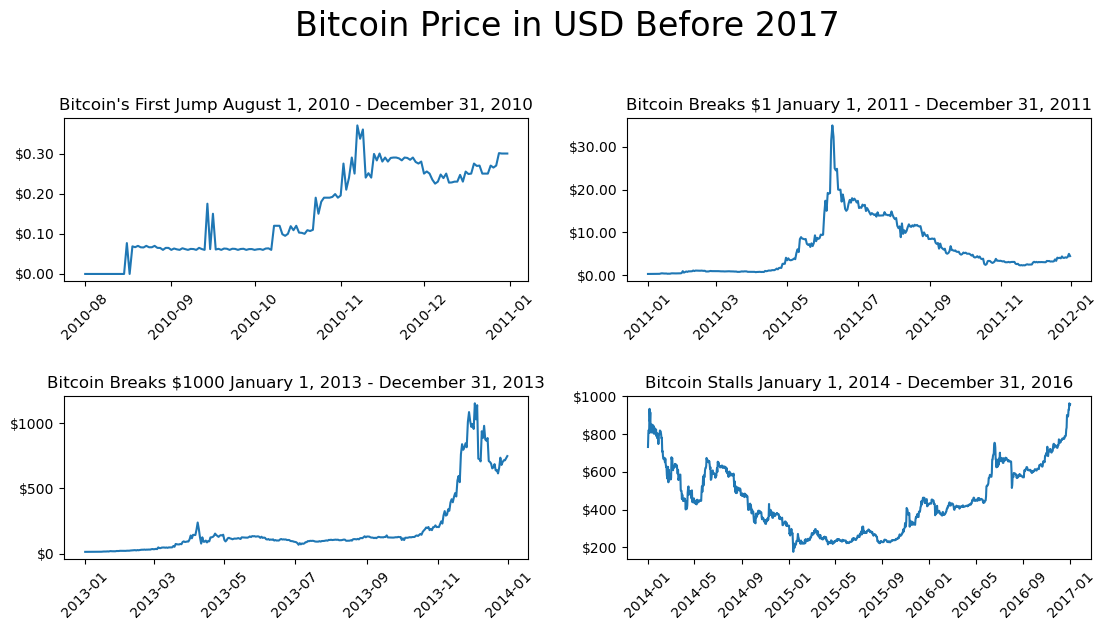

In [23]:
fig, axs = plt.subplots(2,2, figsize=(11,6))

fig.tight_layout(h_pad=8, w_pad=4)
fig.subplots_adjust(top=0.8)
fig.suptitle('Bitcoin Price in USD Before 2017', fontsize=24)

axs[0][0].set_title("Bitcoin's First Jump August 1, 2010 - December 31, 2010")
axs[0][0].yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:.2f}'))
axs[0][0].tick_params(axis='x', rotation=45)
axs[0][0].plot(bitcoin_df.loc['2010-08-01':'2010-12-31'].index.values,
               bitcoin_df.loc['2010-08-01':'2010-12-31', 'MKPRU'])

axs[0][1].set_title("Bitcoin Breaks $1 January 1, 2011 - December 31, 2011")
axs[0][1].yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:.2f}'))
axs[0][1].tick_params(axis='x', rotation=45)
axs[0][1].plot(bitcoin_df.loc['2011-01-01':'2011-12-31'].index.values,
               bitcoin_df.loc['2011-01-01':'2011-12-31', 'MKPRU'])

axs[1][0].set_title("Bitcoin Breaks \$1000 January 1, 2013 - December 31, 2013")
axs[1][0].yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:.0f}'))
axs[1][0].tick_params(axis='x', rotation=45)
axs[1][0].plot(bitcoin_df.loc['2013-01-01':'2013-12-31'].index.values,
               bitcoin_df.loc['2013-01-01':'2013-12-31', 'MKPRU'])

axs[1][1].set_title("Bitcoin Stalls January 1, 2014 - December 31, 2016")
axs[1][1].yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:.0f}'))
axs[1][1].tick_params(axis='x', rotation=45)
axs[1][1].plot(bitcoin_df.loc['2014-01-01':'2016-12-31'].index.values,
               bitcoin_df.loc['2014-01-01':'2016-12-31', 'MKPRU'])


### 2017 Bull Run

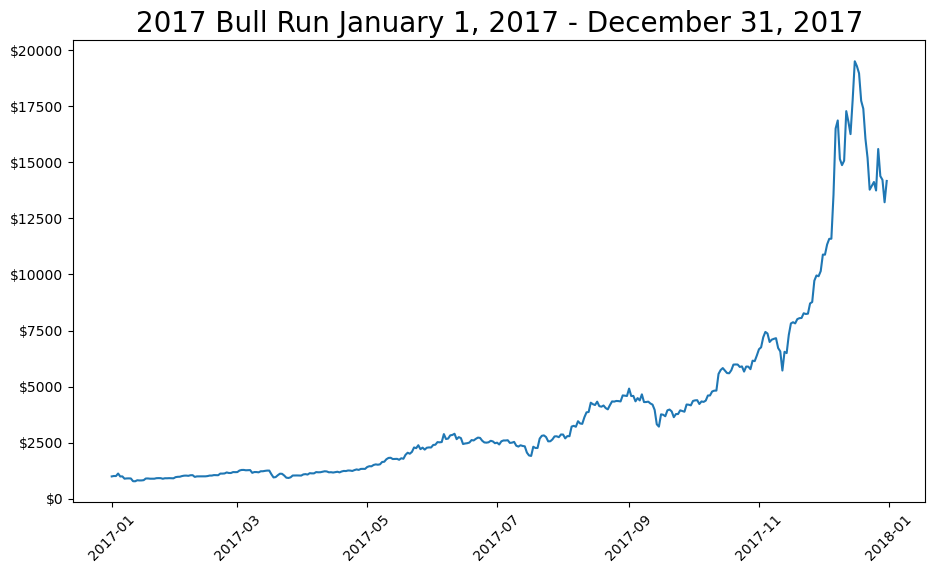

In [26]:
fig, ax = plt.subplots(figsize=(11,6))
ax.set_title("2017 Bull Run January 1, 2017 - December 31, 2017", fontsize=20)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:.0f}'))
ax.tick_params(axis='x', rotation=45)
ax.plot(bitcoin_df.loc['2017-01-01':'2017-12-31'].index.values,
               bitcoin_df.loc['2017-01-01':'2017-12-31', 'MKPRU'])

### More Ups and Downs

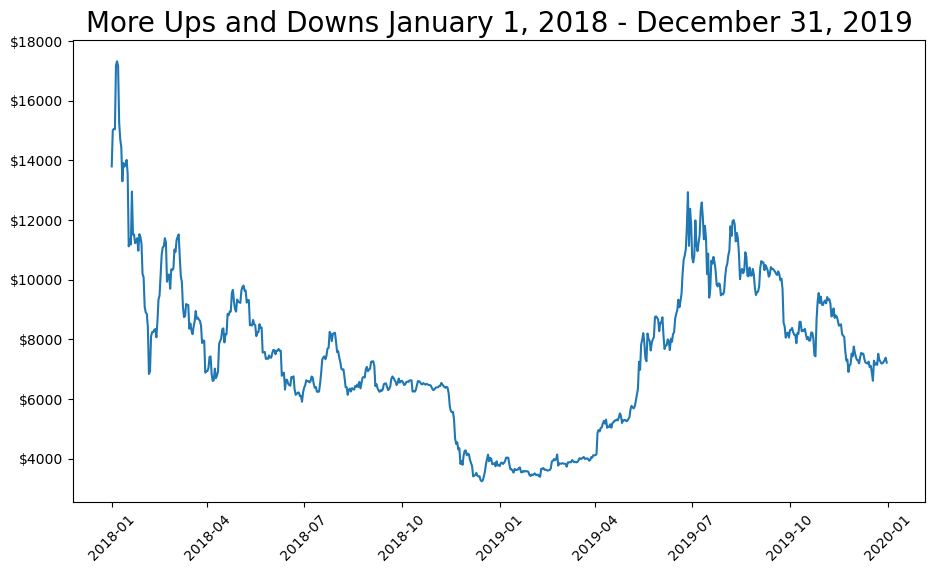

In [27]:
fig, ax = plt.subplots(figsize=(11,6))
ax.set_title("More Ups and Downs January 1, 2018 - December 31, 2019", fontsize=20)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:.0f}'))
ax.tick_params(axis='x', rotation=45)
ax.plot(bitcoin_df.loc['2018-01-01':'2019-12-31'].index.values,
               bitcoin_df.loc['2018-01-01':'2019-12-31', 'MKPRU'])

### 2020 March Covid Crash

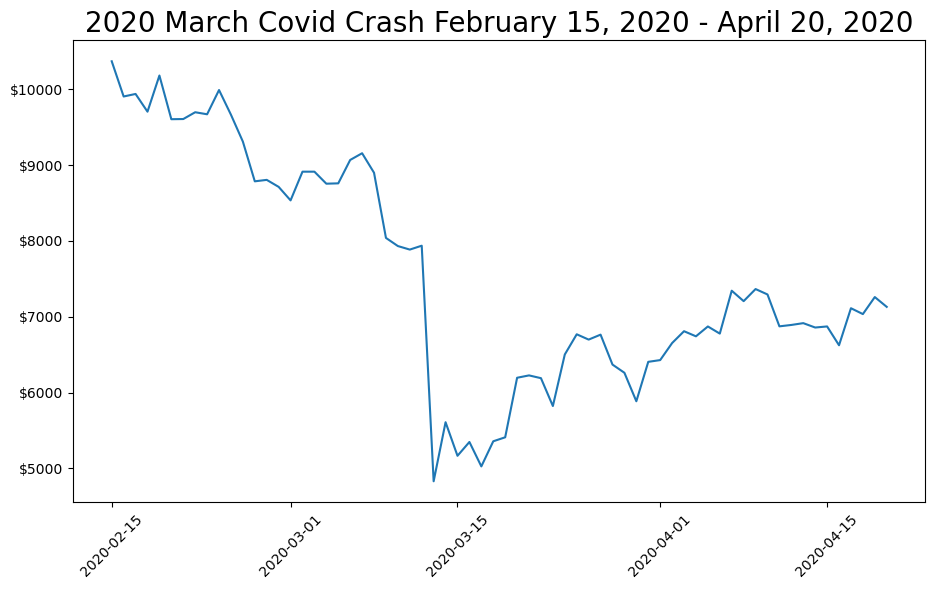

In [28]:
fig, ax = plt.subplots(figsize=(11,6))
ax.set_title("2020 March Covid Crash February 15, 2020 - April 20, 2020", fontsize=20)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:.0f}'))
ax.tick_params(axis='x', rotation=45)
ax.plot(bitcoin_df.loc['2020-02-15':'2020-04-20'].index.values,
               bitcoin_df.loc['2020-02-15':'2020-04-20', 'MKPRU'])

In [29]:
covid_high = bitcoin_df.loc['2020-02-15':'2020-04-20']['MKPRU'].max()
covid_low = bitcoin_df.loc['2020-02-15':'2020-04-20']['MKPRU'].min()
covid_crash_amount = covid_high - covid_low

In [30]:
print(f'From February 2020 to March 2020, Bitcoin crashed from ${int(covid_high)} to ${int(covid_low)}')

From February 2020 to March 2020, Bitcoin crashed from $10368 to $4830


### 2021 Bull Market Crash

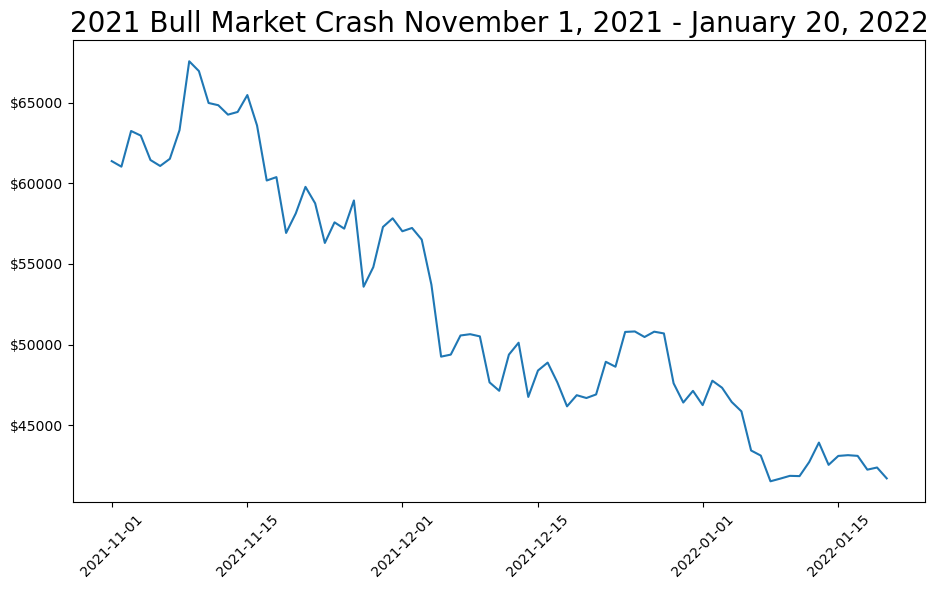

In [31]:
fig, ax = plt.subplots(figsize=(11,6))
ax.set_title("2021 Bull Market Crash November 1, 2021 - January 20, 2022", fontsize=20)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:.0f}'))
ax.tick_params(axis='x', rotation=45)
ax.plot(bitcoin_df.loc['2021-11-01':'2022-01-20'].index.values,
               bitcoin_df.loc['2021-11-01':'2022-01-20', 'MKPRU'])

In [32]:
high = bitcoin_df.loc['2021-11-01':'2022-01-20']['MKPRU'].max()
low = bitcoin_df.loc['2021-11-01':'2022-01-20']['MKPRU'].min()
crash_amount = covid_high - covid_low

In [33]:
print(f'From November 2021 to January 2022, Bitcoin crashed from ${int(high)} to ${int(low)}')

From November 2021 to January 2022, Bitcoin crashed from $67562 to $41528


We're going to visualize a few things that I already know about Bitcoin. For example, Bitcoin's maximum supply will only ever be 21 million bitcoins and can never change. After every Bitcoin "halving", an event in which the rate at which mining rewards are distributed is cut in half, historically this has always been the starting point of the last few bull runs. A Bitcoin halving occurs about every 210,000 blocks or 4 years. If you do the math, the last bitcoins should be mined in the year 2140. However, by 2036 99% of bitcoins will be mined and by 2048 99.9% of bitcoins will be mined.

Let's see what the current number of bitcoins mined (circulating supply) is.

In [34]:
print(f"Latest Circulating Supply (Bitcoins Mined): {bitcoin_df['TOTBC'].tail()[4]:,.0f}")

Latest Circulating Supply (Bitcoins Mined): 19,233,038


## Visualizing the Scarcity of Bitcoin

Text(2020-05-11 00:00:00, 17500000, 'Third Halving')

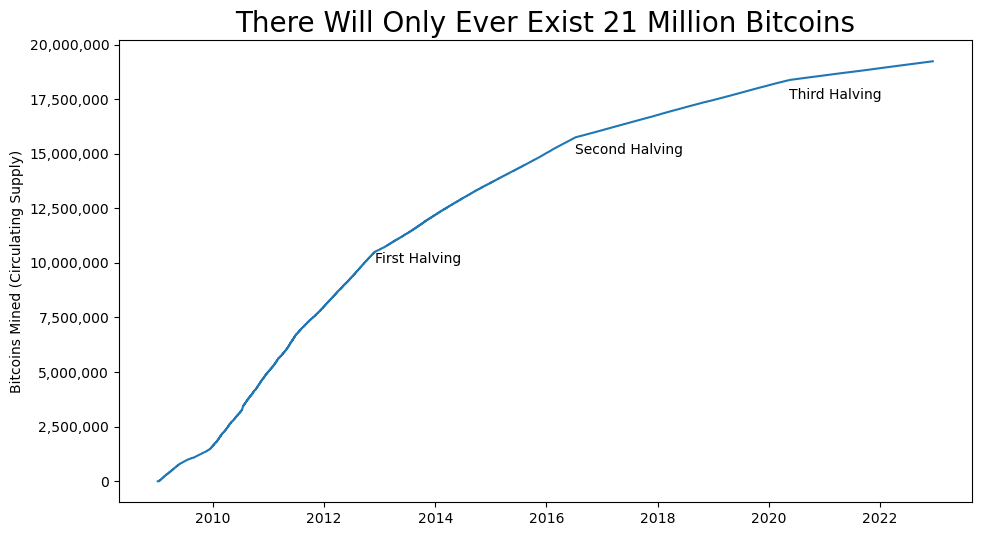

In [35]:
fig, ax = plt.subplots(figsize=(11,6))
ax.set_title('There Will Only Ever Exist 21 Million Bitcoins', fontsize=20)
ax.set_ylabel('Bitcoins Mined (Circulating Supply)')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.plot(bitcoin_df.index.values, bitcoin_df['TOTBC'])

# annotations
# first halving 28 Nov 2012
ax.text(pd.to_datetime('2012-11-28'), 10000000, 'First Halving')
# second halving 9 Jul 2016
ax.text(pd.to_datetime('2016-07-09'), 15000000, 'Second Halving')
# third halving 11 May 2020
ax.text(pd.to_datetime('2020-05-11'), 17500000, 'Third Halving')


## Questions

### What were the lows and the highs of the last 3 bull markets?

In [42]:
def high_and_low(df):
    year = pd.to_datetime(df.index[0]).year
    print(f'High of {year} bull run: ${df.max():,.2f}')
    print(f'Low of {year} bull run: ${df.min():,.2f}')
    print()

# 2013 bull run
high_and_low(bitcoin_df.loc['2013-01-01':'2013-12-31', 'MKPRU'])

# 2017 bull run
high_and_low(bitcoin_df.loc['2017-01-01':'2017-12-31', 'MKPRU'])

# 2021 bull run
high_and_low(bitcoin_df.loc['2021-11-01':'2022-01-20', 'MKPRU'])

High of 2013 bull run: $1,151.00
Low of 2013 bull run: $13.40

High of 2017 bull run: $19,498.68
Low of 2017 bull run: $780.92

High of 2021 bull run: $67,562.17
Low of 2021 bull run: $41,528.04



### What is the highest number of transactions that have been processed in a day? What happened to the cost per transaction during this time?

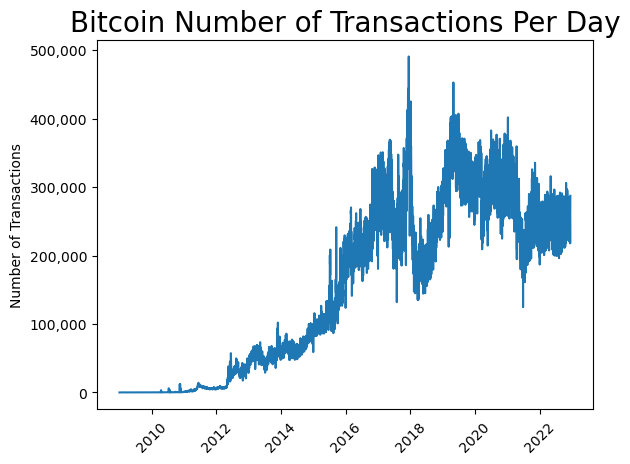

In [43]:
fig, ax = plt.subplots()
ax.set_title('Bitcoin Number of Transactions Per Day', fontsize=20)
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Number of Transactions')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.plot(bitcoin_df.index.values, bitcoin_df['NTRAN'])

In [60]:
max_num_transactions_all_time, max_num_transactions_date = bitcoin_df['NTRAN'].max(), bitcoin_df.query("NTRAN == NTRAN.max()").index

In [73]:
max_num_transactions_date

DatetimeIndex(['2017-12-14'], dtype='datetime64[ns]', name='Date', freq=None)

Let's get all the rows from December 2017 to see what was happening to the cost per transaction around this time

In [76]:
dec_2017_df = bitcoin_df.query("year == 2017 & month == 12")

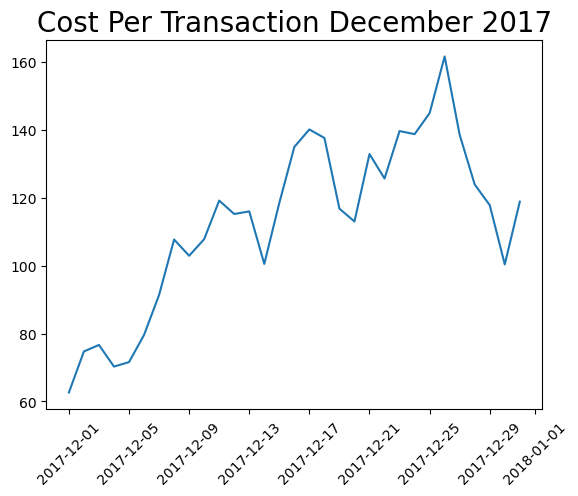

In [89]:
fig, ax = plt.subplots()
ax.set_title('Cost Per Transaction December 2017', fontsize=20)
ax.tick_params(axis='x', rotation=45)
ax.plot(dec_2017_df.index.values, dec_2017_df['CPTRA'])

The cost per transaction was spiking around this time. It was due to the peak of the 2017 bull market occurring. When the blocks get full, people that want to cash out their Bitcoin become willing to pay exorbitant fees to get their transaction processed in a block as quickly as possible. It makes sense that the blocks would get full around this time.

### What were the top 10 most expensive months to make a transaction on the Bitcoin network? What events do you think were occurring to cause this spike?

In [126]:
# groupby year and month then take the sum of CPTRA
cptra_by_year_month = bitcoin_df.groupby(['year', 'month'])['CPTRA'].sum().nlargest(10)
cptra_by_year_month

year  month
2021  10       6388.695652
      11       6172.749379
      4        6153.701926
      8        5919.610385
      3        5805.726746
      5        5707.900185
      12       5552.971848
      9        5244.670826
2022  1        4963.552716
      3        4716.502810
Name: CPTRA, dtype: float64

The most expensive months to make a transaction on Bitcoin were March, April, May, August, September, October, November, December of 2021 and January, March of 2022. This was due to the 2021 Fed money printing bull market and the following selloffs after the bubble popped.

### How many unique addresses were there each year? What events do you think caused a sudden interest in Bitcoin and consequently an increase in new addresses?

In [160]:
unique_addresses_by_year = bitcoin_df.groupby('year')['NADDU'].max().to_frame()

<BarContainer object of 14 artists>

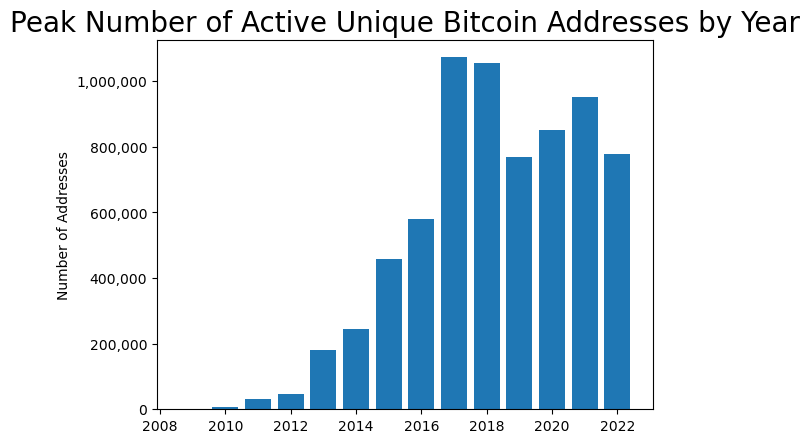

In [161]:
fig, ax = plt.subplots()
ax.set_title('Peak Number of Active Unique Bitcoin Addresses by Year', fontsize=20)
ax.set_ylabel('Number of Addresses')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.bar(unique_addresses_by_year.index.values, unique_addresses_by_year['NADDU'])

As expected, the most Bitcoin addresses in use were during the 2017 bull market and 2021 bull market. The years after those bull markets also had a lot of selloff activity from the previous bull market as users start to liquidate into the bear market.

### Is there a relationship between the Bitcoin hashrate and the Bitcoin difficulty? If there is, why is that?

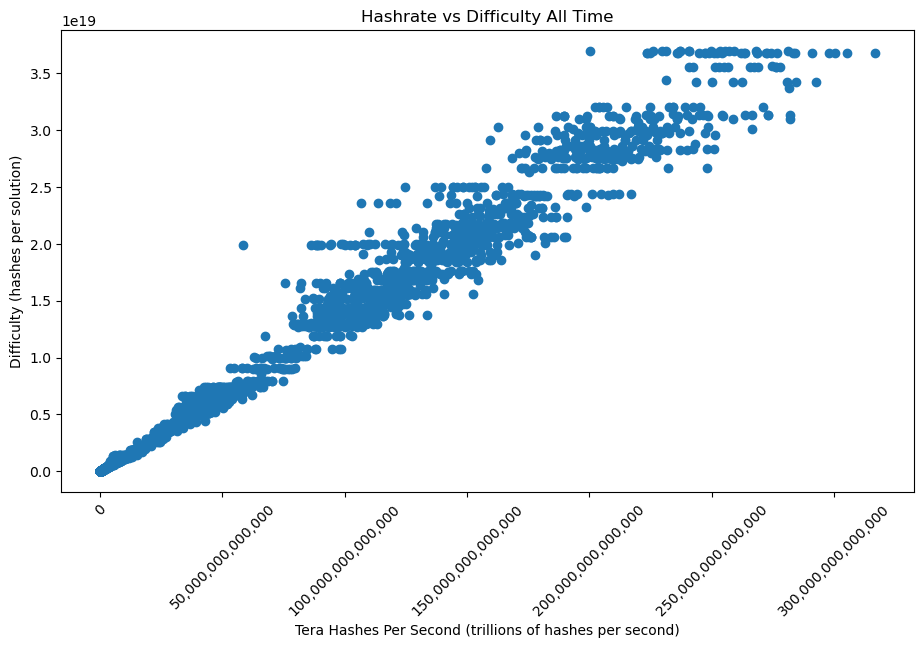

In [135]:
# scatter plot of the relationship between the hashrate and the difficulty
fig, ax = plt.subplots(figsize=(11,6))
ax.set_title('Hashrate vs Difficulty All Time')
ax.set_xlabel('Tera Hashes Per Second (trillions of hashes per second)')
ax.tick_params(axis='x', rotation=45)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('Difficulty (hashes per solution)')
ax.scatter(bitcoin_df['HRATE'] * 1_000_000, bitcoin_df['DIFF'] * 1_000_000)

It appears, that the hashrate and difficulty have a close to linear relationship. This is because the Bitcoin protocol automatically adjusts the difficulty based on the current hashrate so that there will be approximately 1 block processed every 10 minutes regardless of how much hashing power the network has. The higher the hashrate, the higher the security of the network, but block production time stays at approximately 10 minutes.

### What happens to miner revenue and the network hashrate during bear markets?

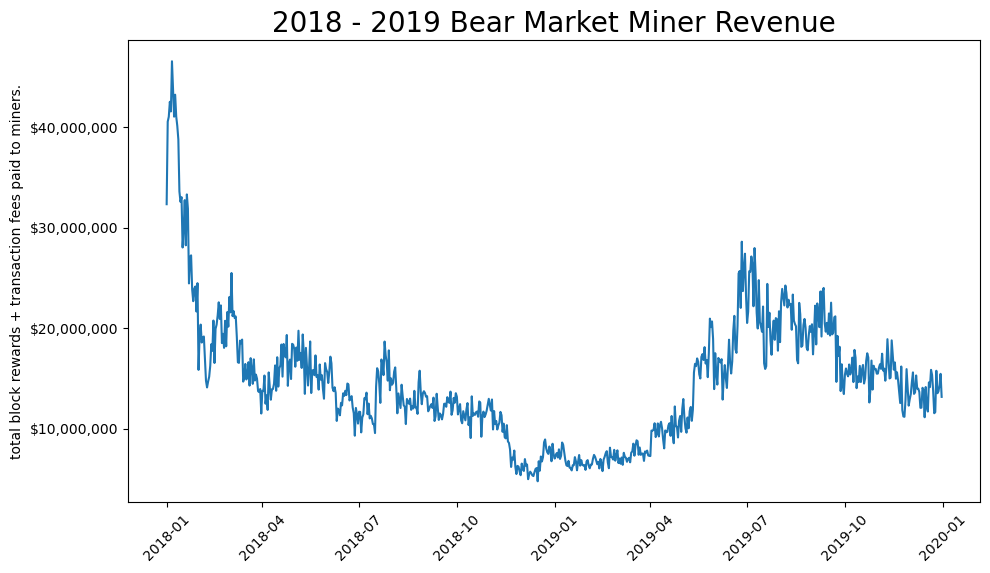

In [168]:
# 2018 - 2019 bear market
fig, ax = plt.subplots(figsize=(11,6))
ax.set_title("2018 - 2019 Bear Market Miner Revenue", fontsize=20)
ax.set_ylabel('total block rewards + transaction fees paid to miners.')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
ax.tick_params(axis='x', rotation=45)
ax.plot(bitcoin_df.loc['2018-01-01':'2019-12-31'].index.values,
               bitcoin_df.loc['2018-01-01':'2019-12-31', 'MIREV'])

During the 2018 - 2019 bear market, miner revenue plunged and stayed sideways until an eventual capitulation at around December 2018. Whenever the hashrate goes down, it becomes easier to compete in the network. In other words, when miners leave the network, it causes the hashrate to drop then new miners to pick up the slack. 

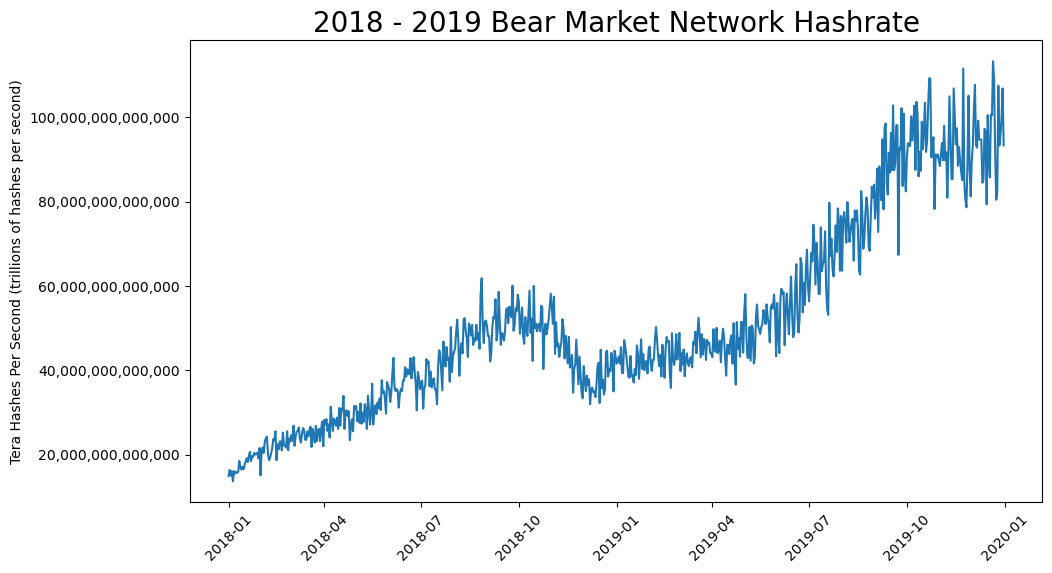

In [173]:
# 2018 - 2019 bear market
fig, ax = plt.subplots(figsize=(11,6))
ax.set_title("2018 - 2019 Bear Market Network Hashrate", fontsize=20)
ax.set_ylabel('Tera Hashes Per Second (trillions of hashes per second)')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.tick_params(axis='x', rotation=45)
ax.plot(bitcoin_df.loc['2018-01-01':'2019-12-31'].index.values,
               bitcoin_df.loc['2018-01-01':'2019-12-31', 'HRATE'] * 1_000_000)

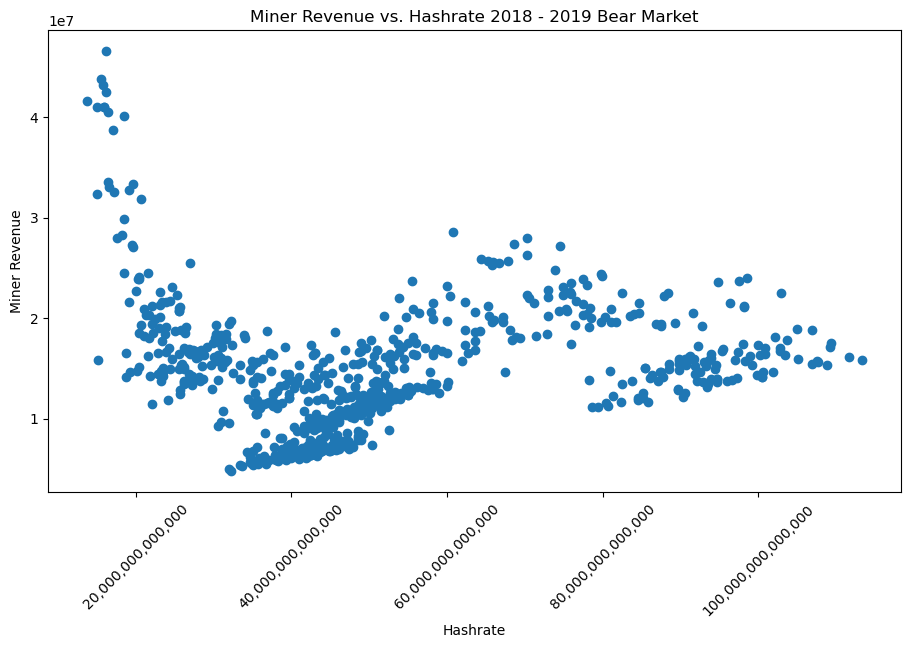

In [176]:
# What's the relationship between Miner Revenue and Hashrate during the bear market?

fig, ax = plt.subplots(figsize=(11,6))
ax.set_title('Miner Revenue vs. Hashrate 2018 - 2019 Bear Market')
ax.set_ylabel('Miner Revenue')
ax.tick_params(axis='x', rotation=45)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xlabel('Hashrate')
ax.scatter(bitcoin_df.loc['2018-01-01':'2019-12-31', 'HRATE'] * 1_000_000,
          bitcoin_df.loc['2018-01-01':'2019-12-31', 'MIREV'])

As the hashrate increases, miner revenue starts to drop until we eventually reach a capitulation point where new miners are now willing to join the network, then a steady increase in hashrate from there.

### How high do fees get once the blocks get full? What are the top 10 highest fees that anyone has ever been able to pay to get their transaction processed quickly?

Let's say that the threshold for blocks being considered close to full is 2500 or more

In [207]:
blocks_full = bitcoin_df.query("NTRBL >= 2500")[['TRFUS', 'NTRBL']]
blocks_full = blocks_full.sort_values(by='NTRBL')

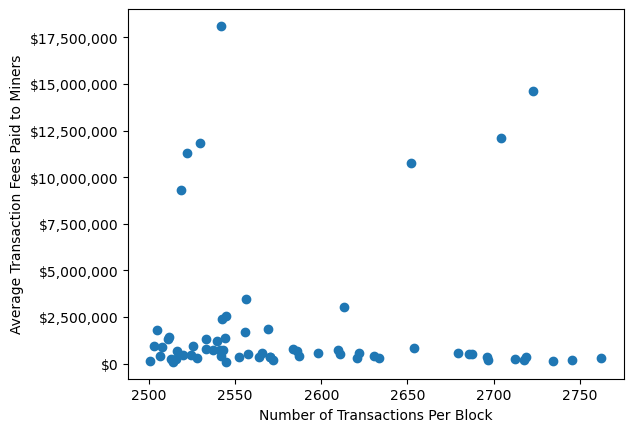

In [211]:
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
ax.set_xlabel('Number of Transactions Per Block')
ax.set_ylabel('Average Transaction Fees Paid to Miners')
ax.scatter(blocks_full['NTRBL'], blocks_full['TRFUS'])

It looks like transaction fees mostly hover around the lower end with a few outliers. For the outliers, people are willing to pay extremely exorbitant fees to get their transaction processed. The outliers probably occur at mass liquidation events such as a bull market bubble popping or the March 2020 Covid crash.

Let's see what was happening during the biggest outlier

In [212]:
highest_fees_day = blocks_full.query("TRFUS == TRFUS.max()")

In [219]:
highest_fees_day

,TRFUS,NTRBL
Date,,
2017-12-21,1.811381e+07,2541.530303


Wouldn't you know it, the highest ever day for transaction fees paid to miners was on December 21, 2017, right at the peak of the 2017 bull market.

### How much longer does it take on average for a transaction to get confirmed when the blocks are full in comparison to when blocks are not full?

In [225]:
# ATRCT
# Bitcoin Median Transaction Confirmation Time in Minutes
# The median time for a transaction to be accepted into a mined block and added to the public ledger 
# (note: only includes transactions with miner fees).

blocks_are_full = bitcoin_df.query("NTRBL >= 2500")[['ATRCT', 'NTRBL']]

# take the 66 most recent, 66 is the same shape as blocks_are_full
blocks_are_not_full = bitcoin_df.query("NTRBL >= 1500 & NTRBL < 2500")[['ATRCT', 'NTRBL']].tail(66)


(66, 2)

In [228]:
transaction_time_full = blocks_are_full['ATRCT'].mean()

In [229]:
transaction_time_not_full = blocks_are_not_full['ATRCT'].mean()

In [231]:
print(f"When the blocks are full, on average it takes {transaction_time_full:.2f} minutes to get your transaction confirmed")
print(f"When the blocks are not full, on average it takes {transaction_time_not_full:.2f} minutes to get your transaction confirmed")
print("This doesn't seem like a large difference, but for a blockchain that is a huge difference in time.")

When the blocks are full, on average it takes 13.08 minutes to get your transaction confirmed
When the blocks are not full, on average it takes 7.36 minutes to get your transaction confirmed
This doesn't seem like a large difference, but for a blockchain that is a huge difference in time.


### Compare the number of transactions with the number of transactions excluding the top 100 most popular addresses. Who do you think these most popular addresses are?

In [278]:
# NTRAT
# Bitcoin Total Number of Transactions
# Total Number of transactions

# NTREP
# Bitcoin Number of Transactions Excluding Popular Addresses
# The total number of Bitcoin transactions, excluding those involving any of the network's 100 most popular addresses.

transactions = bitcoin_df[['NTRAT', 'NTREP']].copy(deep=True)
transactions['DIFF'] = transactions['NTRAT'] - transactions['NTREP']

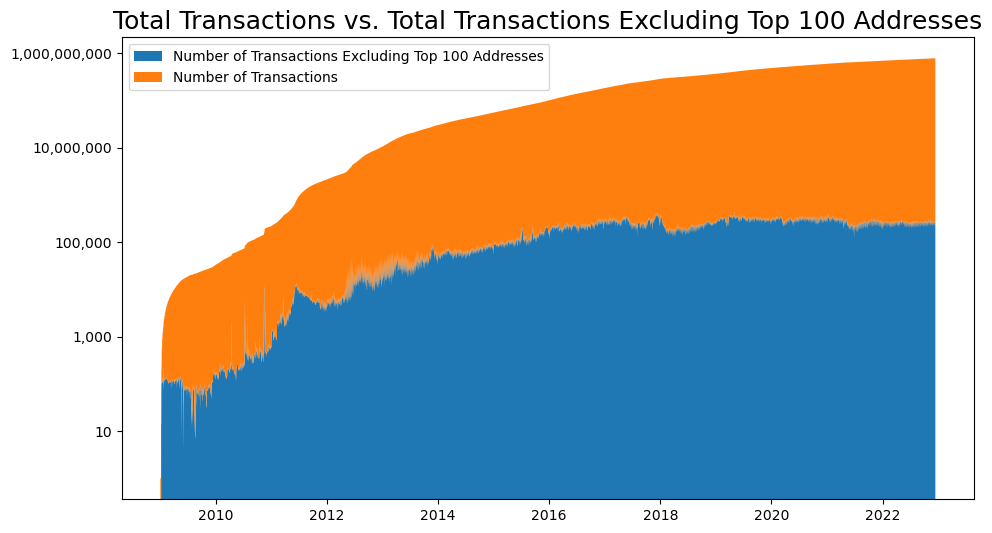

In [277]:
fig, ax = plt.subplots(figsize=(11,6))
ax.set_title('Total Transactions vs. Total Transactions Excluding Top 100 Addresses', fontsize=18)
ax.set_yscale('log')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.stackplot(transactions.index.values, 
             transactions['NTREP'],
             transactions['NTRAT'], 
             labels=['Number of Transactions Excluding Top 100 Addresses', 'Number of Transactions']
            )
ax.legend(loc='upper left')

It's very important to note that I had to use a log scale on the y axis in order for the number of transactions excluding the top 100 addresses to show. This means that this number of transactions is significantly less than the number of transactions when including the top 100 addresses. In order words, the top 100 addresses have always been responsible for the vast majority of number of transactions at any given point in time. These top 100 addresses are likely exchanges and whales.

### What percentage of transaction volume were exchanges responsible for during the last bull market?

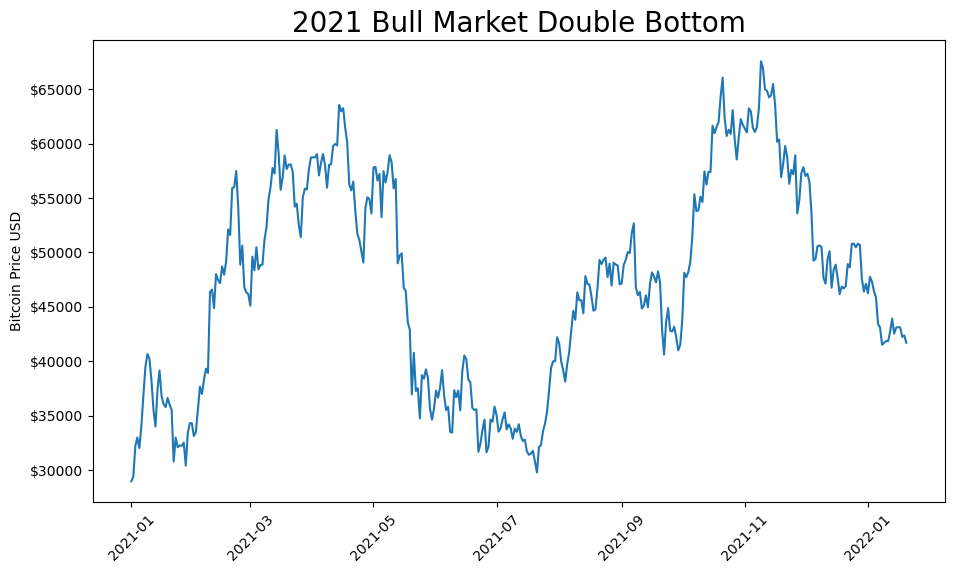

In [240]:
# TRVOU
# Bitcoin USD Exchange Trade Volume
# The total USD value of trading volume on major bitcoin exchanges.

# ETRVU
# Bitcoin Estimated Transaction Volume USD
# The Estimated Transaction Value in USD value.

fig, ax = plt.subplots(figsize=(11,6))
ax.set_title("2021 Bull Market Double Bottom", fontsize=20)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:.0f}'))
ax.set_ylabel('Bitcoin Price USD')
ax.tick_params(axis='x', rotation=45)
ax.plot(bitcoin_df.loc['2021-1-01':'2022-01-20'].index.values,
               bitcoin_df.loc['2021-1-01':'2022-01-20', 'MKPRU'])

In [242]:
# get the rows from the 2021 bull market
volume = bitcoin_df.loc['2021-1-01':'2022-01-20'][['TRVOU', 'ETRVU']]

In [243]:
volume.head()

,TRVOU,ETRVU
Date,,
2021-01-01,6.065241e+08,4.343208e+09
2021-01-02,4.912580e+08,6.152237e+09
2021-01-03,1.393907e+09,5.847743e+09
2021-01-04,9.758314e+08,7.503148e+09
2021-01-05,1.432013e+09,6.775408e+09


In [247]:
# make a column for the percentage of volume exchanges were responsible for in a given day
volume['exchange_vol_pct'] = volume['TRVOU'] / volume['ETRVU']

In [279]:
avg_ex_vol_2021_bull = volume['exchange_vol_pct'].mean()

In [280]:
max_ex_vol_2021_bull = volume['exchange_vol_pct'].max()

In [281]:
min_ex_vol_2021_bull = volume['exchange_vol_pct'].min()

In [286]:
print(
    f"""
    During the 2021 bull market, on average exchanges were responsible for {avg_ex_vol_2021_bull:.2%}
    of transaction volume. The most transaction volume exchanges were responsible for on any given day was
    {max_ex_vol_2021_bull:.2%} and the least transaction volume exchanges were responsible for on any given
    day was {min_ex_vol_2021_bull:.2%}
    """
)


    During the 2021 bull market, on average exchanges were responsible for 11.80%
    of transaction volume. The most transaction volume exchanges were responsible for on any given day was
    62.34% and the least transaction volume exchanges were responsible for on any given
    day was 2.38%
    
